## Customer Churn Prediction using Machine Learning

### Objective
The goal of this project is to predict whether a customer will churn (leave the service) based on demographic, service usage, and billing information.

### Approach
- Data cleaning and preprocessing
- Feature encoding
- Model training using Logistic Regression and Random Forest
- Model evaluation using classification metrics
- Feature importance analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("whitegrid")

#importing libraries

In [2]:
df = pd.read_csv("data/telco_customer_churn.csv")
df.head()

#Loading Dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4811-9279,Male,0,No,Yes,29,Yes,No,Month-to-month,Yes,Credit card,23.11,670.19,Yes
1,6514-2674,Male,0,No,Yes,58,No,DSL,Month-to-month,No,Bank transfer,47.23,2739.34,Yes
2,5803-6925,Male,1,Yes,No,45,No,DSL,Two year,No,Electronic check,115.37,5191.65,No
3,3664-7065,Male,0,Yes,Yes,38,Yes,DSL,Month-to-month,No,Bank transfer,64.43,2448.34,No
4,4598-6313,Female,0,No,Yes,22,Yes,DSL,One year,No,Bank transfer,116.97,2573.34,No


In [3]:
df.shape
df.info()

#checking dataset

<class 'pandas.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   str    
 1   gender            3000 non-null   str    
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   str    
 4   Dependents        3000 non-null   str    
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   str    
 7   InternetService   3000 non-null   str    
 8   Contract          3000 non-null   str    
 9   PaperlessBilling  3000 non-null   str    
 10  PaymentMethod     3000 non-null   str    
 11  MonthlyCharges    3000 non-null   float64
 12  TotalCharges      3000 non-null   float64
 13  Churn             3000 non-null   str    
dtypes: float64(2), int64(2), str(10)
memory usage: 328.3 KB


In [4]:
df.drop('customerID', axis=1, inplace=True)

#Dropping Irrelevant Column, customerID is an identifier and not useful for prediction

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

#Handle Missing & Incorrect Data,(Convert TotalCharges to numeric)

In [6]:
df['Churn'].value_counts(normalize=True) * 100

#targeting Variable Distribution

Churn
No     64.266667
Yes    35.733333
Name: proportion, dtype: float64

In [7]:
cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

#Encoding with label encoding to  Columns

In [8]:
df = pd.get_dummies(df,columns=['InternetService', 
                                'Contract', 
                                'PaymentMethod'],
                    drop_first=True)

#One-Hot Encoding with Multi-Class Features

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']

#splitting features and targets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#train and test split

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression (feature scALLING)

In [12]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

#Train Logistic Regression Model 

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#Train Random Forest Model

In [14]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    #model evalution 

In [15]:
evaluate_model("Logistic Regression", y_test, lr_pred)

#Evaluating Logistic Regression


--- Logistic Regression ---
Accuracy:  0.70
Precision: 0.61
Recall:    0.36

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       393
           1       0.61      0.36      0.45       207

    accuracy                           0.70       600
   macro avg       0.67      0.62      0.62       600
weighted avg       0.68      0.70      0.68       600



In [16]:
evaluate_model("Random Forest", y_test, rf_pred)

#Evaluate Random Forest


--- Random Forest ---
Accuracy:  0.68
Precision: 0.57
Recall:    0.34

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       393
           1       0.57      0.34      0.43       207

    accuracy                           0.68       600
   macro avg       0.64      0.60      0.60       600
weighted avg       0.66      0.68      0.66       600



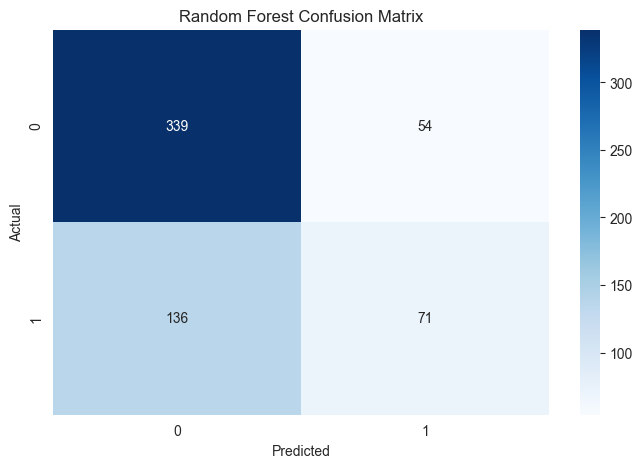

In [17]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#visualize Random Forest CM 

In [18]:
feature_importance = pd.Series(rf_model.feature_importances_,
                               index=X.columns).sort_values(ascending=False)
feature_importance.head(10)

#Feature Importance Analysis

MonthlyCharges       0.209288
TotalCharges         0.207489
tenure               0.187463
Contract_One year    0.038395
Contract_Two year    0.038093
Partner              0.035712
PhoneService         0.035497
PaperlessBilling     0.035283
gender               0.034565
Dependents           0.033692
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

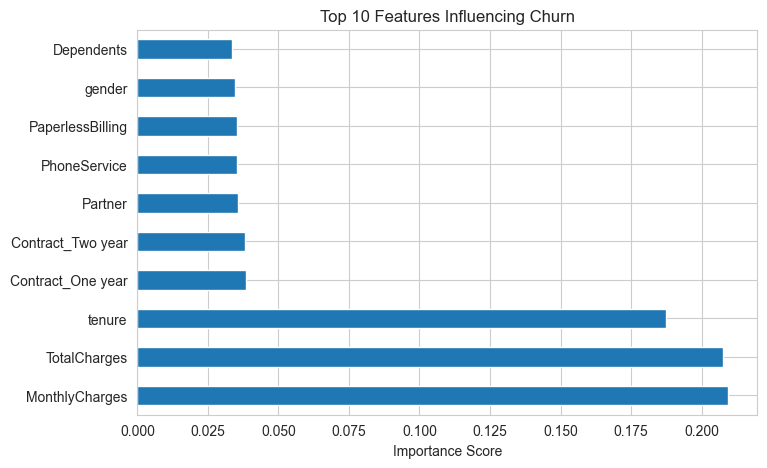

In [19]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance Score")
plt.show

#visualize important features

## Conclusion

- Random Forest outperformed Logistic Regression by capturing non-linear patterns.
- Contract type, tenure, monthly charges, and payment method were strong indicators of churn.
- This model can help businesses identify high-risk customers and take proactive retention actions.